Lección 6. Modelos ARMA. Herramientas estadísticas
==================================================

**Author:** Marcos Bujosa



<div class="abstract" id="orgc2cc346">
<p>
Examinaremos la ACF, la PACF y la densidad espectral de procesos ARMA (que son una generalización de los procesos AR y MA). 
Después repasaremos algunas herramientas estadísticas útiles para tratar de identificar un modelo que se ajuste adecuadamente a los datos de una serie temporal: gráficos, contrastes de raíz unitaria, ACF y PACF muestrales, estadísticos descriptivos y contrastes de normalidad.
</p>

</div>

-   ([slides](https://mbujosab.github.io/Econometria-Aplicada/Transparencias/Lecc06.slides.html)) &mdash; ([html](https://mbujosab.github.io/Econometria-Aplicada/Lecciones-html/Lecc06.html)) &mdash; ([pdf](https://mbujosab.github.io/Econometria-Aplicada/Lecciones-pdf/Lecc06.pdf)) &mdash; ([mybinder](https://mybinder.org/v2/gh/mbujosab/Econometria-Aplicada/gh-pages?labpath=CuadernosElectronicos/Lecc06.ipynb))



#### Carga de algunos módulos de python y creación de directorios auxiliares



In [1]:
# Para trabajar con los datos y dibujarlos necesitamos cargar algunos módulos de python
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
# definimos parámetros para mejorar los gráficos
mpl.rc('text', usetex=False)
import matplotlib.pyplot as plt   # data visualization

##### Directorio auxiliar para albergar las figuras de la lección:



para publicar la lección como pdf o página web, necesito los gráficos como ficheros `.png` alojados algún directorio específico:



In [2]:
imagenes_leccion = "./img/lecc06" # directorio para las imágenes de la lección
import os
os.makedirs(imagenes_leccion, exist_ok=True) # crea el directorio si no existe

#### Gráficos para las ACF, PACF y densidades espectrales teóricas



Cargamos las funciones auxiliares (véase la carpeta `src/`)



In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%run -i ./src/analisis_armas.py

## ACF, PACF y densidad espectral de algunos modelos lineales



### Proceso autorregresivo ARMA(p,q)



Sea $\;\boldsymbol{X}\;$ el proceso estocástico estacionario solución
de la ecuación en diferencias:
$$\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{\theta}*\boldsymbol{U}$$
donde $\;\boldsymbol{U}\sim WN(0,\sigma^2);\;$ el polinomio
*autorregresivo* $\;\boldsymbol{\phi}\;$ tiene <u>grado</u> $p$ con
${{\phi_{0}=1}}$ (y raíces fuera del círculo unidad), y
el polinomio *de media móvil* $\;\boldsymbol{\theta}\;$ es de <u>grado</u>
$q$ con ${{\theta_{0}=1}};\;$ y donde
$\boldsymbol{\phi}$ y $\boldsymbol{\theta}$ no tienen raíces comunes.



Si $\;\;\boldsymbol{\phi}(z)=1-\phi_1z-\cdots-\phi_p z^p\;\;$ y
$\;\;\boldsymbol{\theta}(z)=1-\theta_1z-\cdots-\theta_q z^q,\;\;$
entonces

\begin{align*}
  (1-\phi_1\mathsf{B}-\cdots-\phi_p\mathsf{B}^p)X_t = &
  (1-\theta_1\mathsf{B}-\cdots-\theta_q\mathsf{B}^q)U_t;
\end{align*}

y por tanto $$X_t= U_t + \sum_{j=1}^p\phi_j X_{t-j} +
\sum_{j=1}^q-\theta_j U_{t-j}.$$



Como las raíces de $\boldsymbol{\phi}$ están fuera del círculo unidad,
es decir, como *el polinomio AR es \`\`invertible''*
$\;(\boldsymbol{\phi}^{-\triangleright}=\boldsymbol{\phi}^{-1}\in\ell^1)\;$
entonces $\boldsymbol{X}$ tiene una representación como MA($\infty$):
$$\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{\theta}*\boldsymbol{U}
\quad\Rightarrow\quad
\boldsymbol{X}=\frac{\boldsymbol{\theta}}{\boldsymbol{\phi}}*\boldsymbol{U}
\quad\Rightarrow\quad X_t = U_t + \sum_{j=1}^\infty-\psi_j U_{t-j};$$
donde
$\;\boldsymbol{\psi}=\boldsymbol{\phi}^{-1}*\boldsymbol{\theta}=({\color{blue}1},\
-\psi_1,\ -\psi_2,\ -\psi_3,\ldots)\;$ tiene grado $\infty$.



Y como las raíces de $\boldsymbol{\theta}$ están fuera del círculo
unidad, es decir, como *el polinomio MA es \`\`invertible''*
$\;(\boldsymbol{\theta}^{-\triangleright}=\boldsymbol{\theta}^{-1}\in\ell^1)\;$
entonces $\boldsymbol{X}$ tiene una representación como AR($\infty$):
$$\boldsymbol{\phi}*\boldsymbol{X}=\boldsymbol{\theta}*\boldsymbol{U}
\quad\Rightarrow\quad
\frac{\boldsymbol{\phi}}{\boldsymbol{\theta}}*\boldsymbol{X}=\boldsymbol{U}
\quad\Rightarrow\quad X_t = U_t + \sum_{j=1}^\infty\varphi_j
X_{t-j};$$ donde
$\;\boldsymbol{\varphi}=\boldsymbol{\theta}^{-1}*\boldsymbol{\phi}=({\color{blue}1},\
-\varphi_1,\ -\varphi_2,\ -\varphi_3,\ldots)\;$ tiene grado $\infty$.



En un ARMA($p,q$), por tener representación MA($\infty$):

$E(X_t)=0$ para todo $t\in\mathbb{Z}$ y

$\boldsymbol{\gamma} \;=\; \sigma^2
\frac{\boldsymbol{\theta}(z)}{\boldsymbol{\phi}(z)}*\frac{\boldsymbol{\theta}(z^{-1})}{\boldsymbol{\phi}(z^{-1})}
= \sigma^2 \boldsymbol{\psi}(z)*\boldsymbol{\psi}(z^{-1})\;$ donde $\;\boldsymbol{\psi}=\frac{\boldsymbol{\theta}}{\boldsymbol{\phi}}$;

es decir, $\;\gamma_k = \sigma^2 \sum\nolimits_{j=0}^\infty
\psi_{j+|k|}\psi_j;\quad k\in\mathbb{Z}\;$ (grado $\infty$ y cogrado
$-\infty$).

$\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

$f(\omega) =
  \frac{\sigma^2}{2\pi}\frac{\boldsymbol{\theta}(e^{-i\omega})\cdot\boldsymbol{\theta}(e^{i\omega})}{\boldsymbol{\phi}(e^{-i\omega})\cdot\boldsymbol{\phi}(e^{i\omega})}
  \;=\; \frac{1}{2\pi}\sum\limits_{h=0}^\infty \gamma_h
  \cos(h\omega);\quad$ donde $\omega\in[-\pi,\pi]$.

(suma infinita de cosenos)



En un ARMA($p,q$), por tener representación AR($\infty$):

su PACF, $\;\boldsymbol{\pi},\;$ también es una secuencia con grado
$\infty$ y cogrado $-\infty$.



En la sección [Función de autocovarianzas para un ARMA(p,q)](Lecc06.md) se demuestra que para un proceso ARMA($p,q$)
$$\boldsymbol{\phi}(\mathsf{B})\gamma_k = 
\begin{cases}
  \sigma^2 \Big(\boldsymbol{\theta}(z)*\boldsymbol{\psi}(z^{-1})\Big)_k & \text{para } k\leq q \\
  0 & \text{para } k > q \quad \text{(como en un AR)}
\end{cases}$$



Así, en cuanto a la ACF $\boldsymbol{\rho}$:

-   De $\rho_1$ a $\rho_q$ dependen de los $q$ parámetros de
    $\boldsymbol{\theta}$ y los $p$ parámetros de $\boldsymbol{\phi}$
-   Los $p$ valores de $\rho_q$ a $\rho_{q-p+1}$ son los valores
    iniciales para resolver la ecuación en diferencias de [Yule-Walker](https://mbujosab.github.io/Econometria-Aplicada/Lecciones-pdf/Lecc05.pdf#section.5)
    $\boldsymbol{\phi}(\mathsf{B})\rho_k=0\;$ (con $k> q)$
-   Si $q < p$ toda la secuencia $\rho_j$ para $j \geq 0$ decae
    exponencialmente o sinusoidalmente según $\boldsymbol{\phi}$ y los
    valores iniciales $\rho_q$ a $\rho_{q-p+1}$
-   Si $q \geq p$ los primeros $q-p+1$ valores iniciales $\rho_0$ a
    $\rho_{q-p}$ siguen una pauta diferente

En cuanto a la PACF $\boldsymbol{\pi}$:

-   Tiene grado $\infty$ y cogrado $-\infty$
-   A partir de cierto retardo se comporta como la PACF de un MA($q$),
    es decir, decae exponencialmente o sinusoidalmente.



### Proceso ARMA(1,1)



Sea $\;(1-\phi z)*\boldsymbol{X}=(1-\theta z)*\boldsymbol{U}\;$ con
$|\phi|<1$ y $|\theta|<1$ y con $\;\boldsymbol{U}\sim
WN(0,\sigma^2):$ 

$$X_t=\phi X_{t-1}-\theta U_{t-1} + U_t.$$

-   $\boldsymbol{\gamma} \;=\; \sigma^2 \frac{(1-\theta z)*(1-\theta z^{-1})}{(1-\phi z)*(1-\phi z^{-1})}\; \text{ por tanto... }$

-   $\gamma_0 =
      \sigma^2\left(1+\frac{(\theta+\phi)^2}{1+\phi^2}\right);\;\;
      \gamma_1 =
      \sigma^2\left(\phi+\theta+\frac{(\theta+\phi)^2\phi}{1+\phi^2}\right);\;\;
      \gamma_k =\phi\gamma_{k-1}\;\;\text{si } k>1$

-   $\boldsymbol{\rho} \;=\; \frac{1}{\gamma_0}\boldsymbol{\gamma}$

-   $f(\omega) \;=\;
      \;=\;
      \frac{\sigma^2}{2\pi}\frac{1+\theta^2-2\theta\cos(\omega)}{1+\phi^2-2\phi\cos(\omega)};\quad
      \omega\in[-\pi,\pi]$

-   $\boldsymbol{\pi} \text{ decae geométricamente con } \theta^k$



#### ARMA(1,1) (Ejemplo 1)



$$(1 - 0.7\mathsf{B}){X_t}=(1 + 0.8\mathsf{B}){U_t};\quad \phi>0;\;\theta<0$$



In [4]:
ar_params = [1, -0.7]
ma_params = [1,  0.8]
fig = plot_arma_parametric_diagnostics(ar_params, ma_params, sigma2=1, lags=20)
fig.savefig('./img/lecc06/ACF-arma11R.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/ACF-arma11R.png)



In [5]:
fig = plot_arma_analysis(ar_params, ma_params, seed=2026)
fig.savefig('./img/lecc06/Sim-arma11R.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/Sim-arma11R.png)



#### ARMA(1,1) (Ejemplo 2)



$$(1 + 0.7\mathsf{B}){X_t}=(1 - 0.8\mathsf{B}){U_t};\quad \phi<0;\;\theta>0$$



In [6]:
ar_params = [1,  0.7]
ma_params = [1, -0.8]
fig = plot_arma_parametric_diagnostics(ar_params, ma_params, sigma2=1, lags=20)
fig.savefig('./img/lecc06/ACF-arma11A.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/ACF-arma11A.png)



In [7]:
fig = plot_arma_analysis(ar_params, ma_params, seed=2026)
fig.savefig('./img/lecc06/Sim-arma11A.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/Sim-arma11A.png)



#### ARMA(1,1) (Ejemplo 3)



$$(1 - 0.4\mathsf{B}){X_t}=(1 - 0.8\mathsf{B}){U_t};\quad \phi>0;\;\theta>0$$



In [8]:
ar_params = [1, -0.4]
ma_params = [1, -0.8]
fig = plot_arma_parametric_diagnostics(ar_params, ma_params, sigma2=1, lags=20)
fig.savefig('./img/lecc06/ACF-arma11NVA.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/ACF-arma11NVA.png)



In [9]:
fig = plot_arma_analysis(ar_params, ma_params, seed=2026)
fig.savefig('./img/lecc06/Sim-arma11NVA.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/Sim-arma11NVA.png)



#### ARMA(1,1) (Ejemplo 4)



$$(1 + 0.8\mathsf{B}){X_t}=(1 + 0.4\mathsf{B}){U_t};\quad \phi<0;\;\theta<0$$



In [10]:
ar_params = [1,  0.8]
ma_params = [1,  0.4]
fig = plot_arma_parametric_diagnostics(ar_params, ma_params, sigma2=1, lags=20)
fig.savefig('./img/lecc06/ACF-arma11RNV.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/ACF-arma11RNV.png)



In [11]:
fig = plot_arma_analysis(ar_params, ma_params, seed=2026)
fig.savefig('./img/lecc06/Sim-arma11RNV.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/Sim-arma11RNV.png)



## La especificación del modelo se decide según las características de los datos.



¿Es la serie 

-   \`\`estacionaria en media''?
    -   (y si lo es, ¿cuál es su media?)
    -   (y si no lo es, ¿cómo cambia o evoluciona su media?)
-   \`\`estacionaria en varianza''? (*homocedástica*)
    -   (y si lo es, ¿cuál es su varianza?)
    -   (y si es *heterocedástica*, ¿cómo cambia o evoluciona su varianza?)

¿Están sus valores correlados con su historia pasada (autocorrelados)? (ACF)

¿Qué correlación tienen los datos con los datos de $k$ periodos atrás una
vez descontado el efecto de los datos intermedios? (PACF)

Veamos algunas herramientas estadísticas para poder desvelar estas
características.



## Herramientas para desvelar propiedades de una serie temporal



### Análisis gráfico



#### Gráfico de la serie temporal



Representa sus valores en el eje vertical ($y$) frente a una escala
temporal en el horizontal ($x$). Es útil para detectar visualmente:

-   tendencias y/o estacionalidad
-   cambios de variabilidad
-   valores atípicos (*outliers*)
    -   el 95% aprox. de una muestra de valores generados por una
        distribución normal debería estar comprendido entre
        $\mu\pm2\sigma$
    -   la probabilidad de que una variable normal genere un valor fuera
        de las bandas de $\mu\pm3\sigma$ es $0.0023$
        
        ([véase gráfico IBEX 35](./img/lecc03/IBEX35.png))

Es importante escalar y rotular adecuadamente los ejes y asegurar la
comparabilidad entre series y gráficos distintos (si los hubiere).



#### Gráfico rango-media



Cambios de variabilidad de una serie pueden evidenciarse en su gráfico
temporal.

Pero también suelen verse bien en un gráfico rango-media, donde se
representa:

-   **en eje $x$:** nivel de la serie (normalmente la media de submuestras no solapadas).

-   **en eje $y$:** dispersión de la serie (normalmente el rango de dichas submuestras).

Si los puntos se sitúan alrededor de una recta de pendiente positiva: tomar logaritmos.



Veamos el gráfico de la serie de pasajeros de líneas aéreas junto a su gráfico de rango mediana:



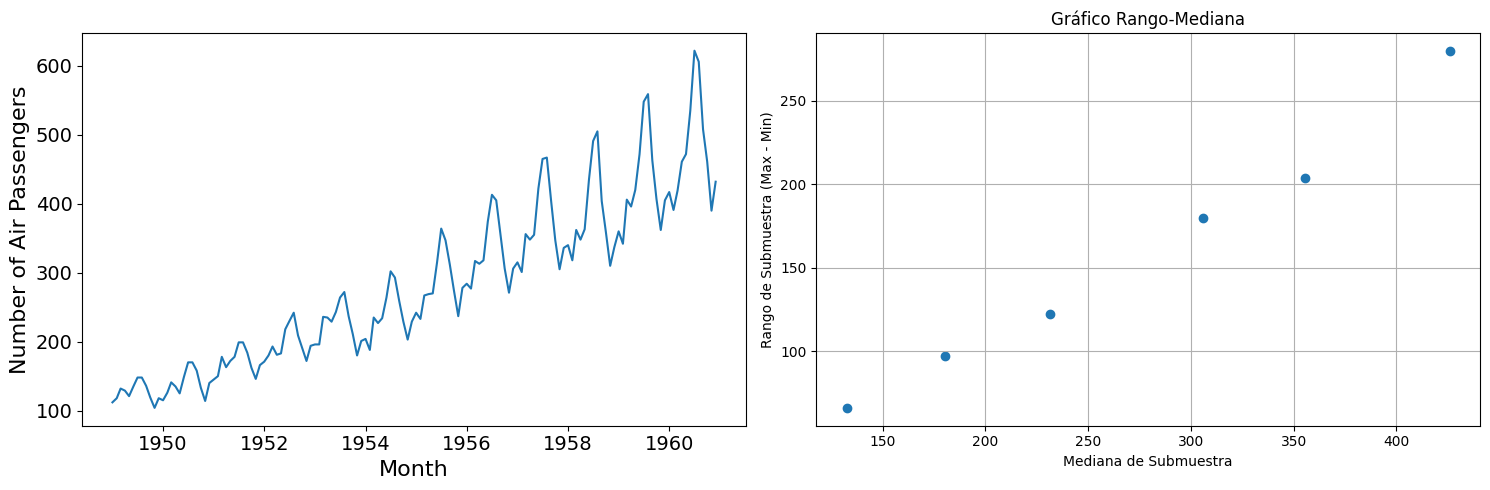

In [12]:
# Leer los datos
df = pd.read_csv('../datos/airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(['Month'])

# Crear la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Graficar la serie de tiempo
axs[0].plot(df['Passengers'])
axs[0].set_xlabel("Month", fontsize=16)
axs[0].set_ylabel(r"Number of Air Passengers", fontsize=16)
axs[0].tick_params(axis='both', labelsize=14)

# Graficar el rango-mediana
RangoMediana(df['Passengers'], ax=axs[1])

plt.tight_layout()
plt.savefig('./img/lecc06/rangoMedianaPasajeros.png', dpi=300, bbox_inches='tight')

![img](img/lecc06/rangoMedianaPasajeros.png)



El gráfico de rango media a veces se acompaña de una regresión de la
dispersión sobre los niveles para medir la relación nivel-dispersión.



### Determinación del orden de integración



Un proceso estocástico sin componentes deterministas es $I(0)$ si
tiene una representación ARMA estacionaria e <u>invertible</u>

El *orden de integración* de un proceso estocástico $\boldsymbol{Y}$
es el número de diferencias necesarias para transformarlo en un
proceso $I(0)$.

Decidir adecuadamente el orden de integración es crucial en el
análisis de series temporales.

Las herramientas utilizadas para tomar la decisión son 

-   el análisis gráfico
-   los contrastes formales



#### Análisis gráfico



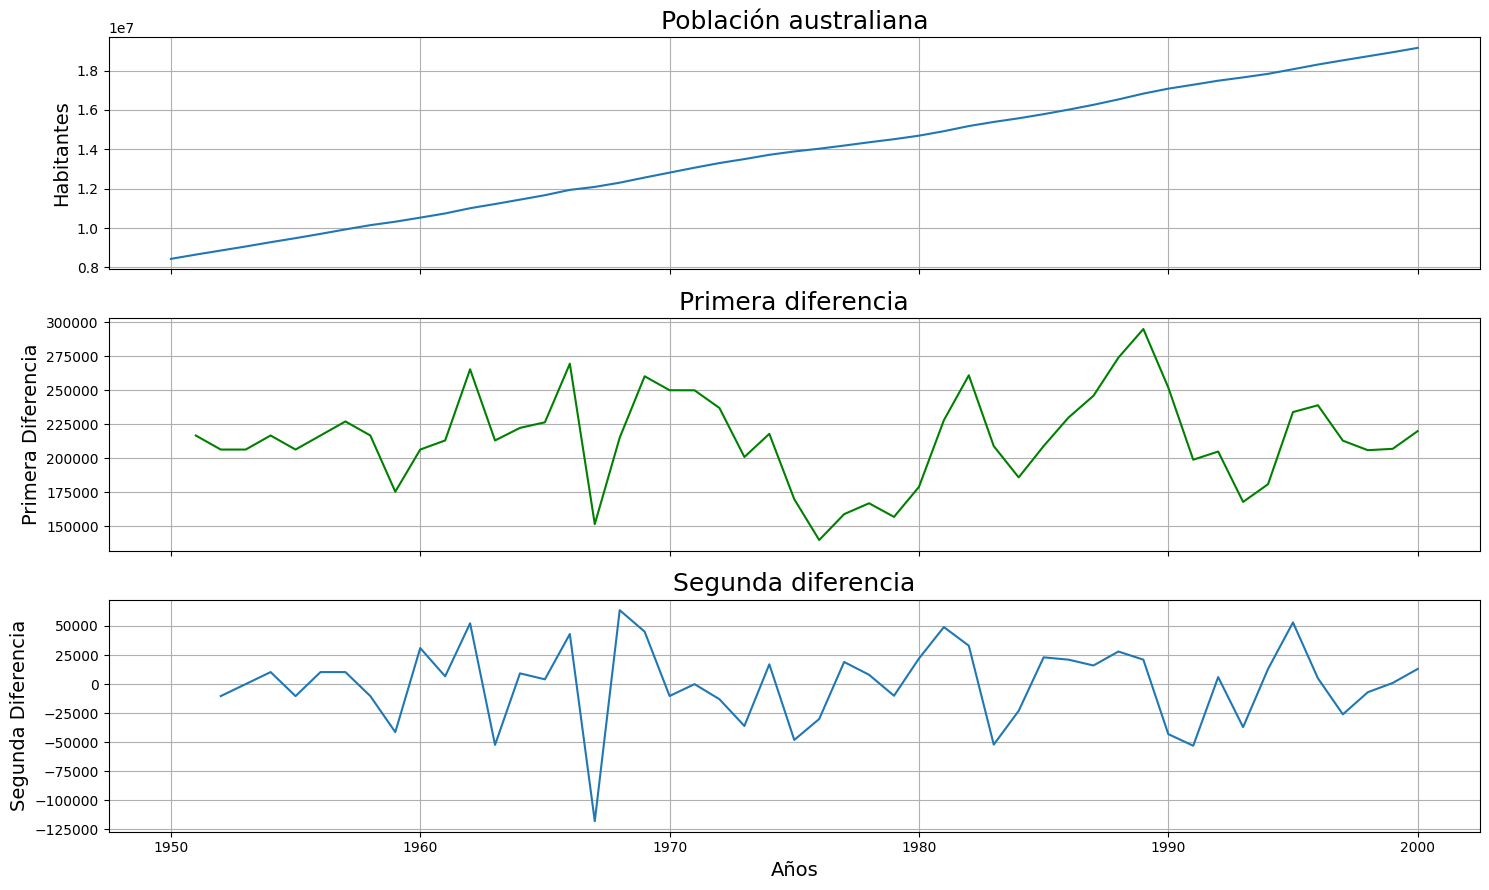

In [13]:
# Leer los datos
df1 = pd.read_csv('../datos/PoblacionAustralia.csv')

# Calcular las diferencias
df1['primera_diferencia'] = df1['pob'].diff()
df1['segunda_diferencia'] = df1['primera_diferencia'].diff()

# Crear la figura y los ejes, compartiendo el eje x
fig, axs = plt.subplots(3, 1, figsize=(15, 9), sharex=True)  # 3 filas, 1 columna

# Graficar la serie temporal
axs[0].plot(df1['obs'], df1['pob'])
axs[0].set_ylabel('Habitantes', fontsize=14)
axs[0].set_title('Población australiana', fontsize=18)
axs[0].grid()

# Graficar la primera diferencia
axs[1].plot(df1['obs'], df1['primera_diferencia'], color='green')
axs[1].set_ylabel('Primera Diferencia', fontsize=14)
axs[1].set_title('Primera diferencia', fontsize=18)
axs[1].grid()

# Graficar la segunda diferencia
axs[2].plot(df1['obs'], df1['segunda_diferencia'])
axs[2].set_xlabel('Años', fontsize=14)
axs[2].set_ylabel('Segunda Diferencia', fontsize=14)
axs[2].set_title('Segunda diferencia', fontsize=18)
axs[2].grid()

# Ajustar el layout
plt.tight_layout()
plt.savefig('./img/lecc06/diferenciasPoblacion.png', dpi=300, bbox_inches='tight')

![img](./img/lecc06/diferenciasPoblacion.png)



La serie de población $\boldsymbol{y}$ tiene una clara tendencia
creciente (primer gráfico), que desaparece al tomar una diferencia
ordinaria, $$\nabla\boldsymbol{y}=(1-\mathsf{B})*\boldsymbol{y}$$
(segundo gráfico). Bastar con tomar una primera diferencia de la serie
de población para obtener una nueva serie que se asemeja a la
realización de un proceso estacionario.

No obstante, ¿qué pasa si tomamos una segunda diferencia ordinaria?
$$\nabla\nabla\boldsymbol{y}=\nabla^2\boldsymbol{y}=(1-\mathsf{B})^2*\boldsymbol{y}$$
(segundo gráfico). Pues que la serie obtenida también es estacionaria,
pero ojo, es un grave error tomar más diferencias de las necesarias al
modelizar los datos. Se debe tomar el mínimo número de
transformaciones que arrojen una serie \`\`estacionaria'' (recuerde que
decir que una serie temporal es *estacionaria* es un abuso del
lenguaje).

Si se toman más diferencias de las necesarias se obtiene un proceso
*no invertible* (raíces unitarias en la parte MA que imposibilitan que
el proceso tenga una representación como AR($\infty$) causal), lo cual
conduce a problemas de identificación y estimación.



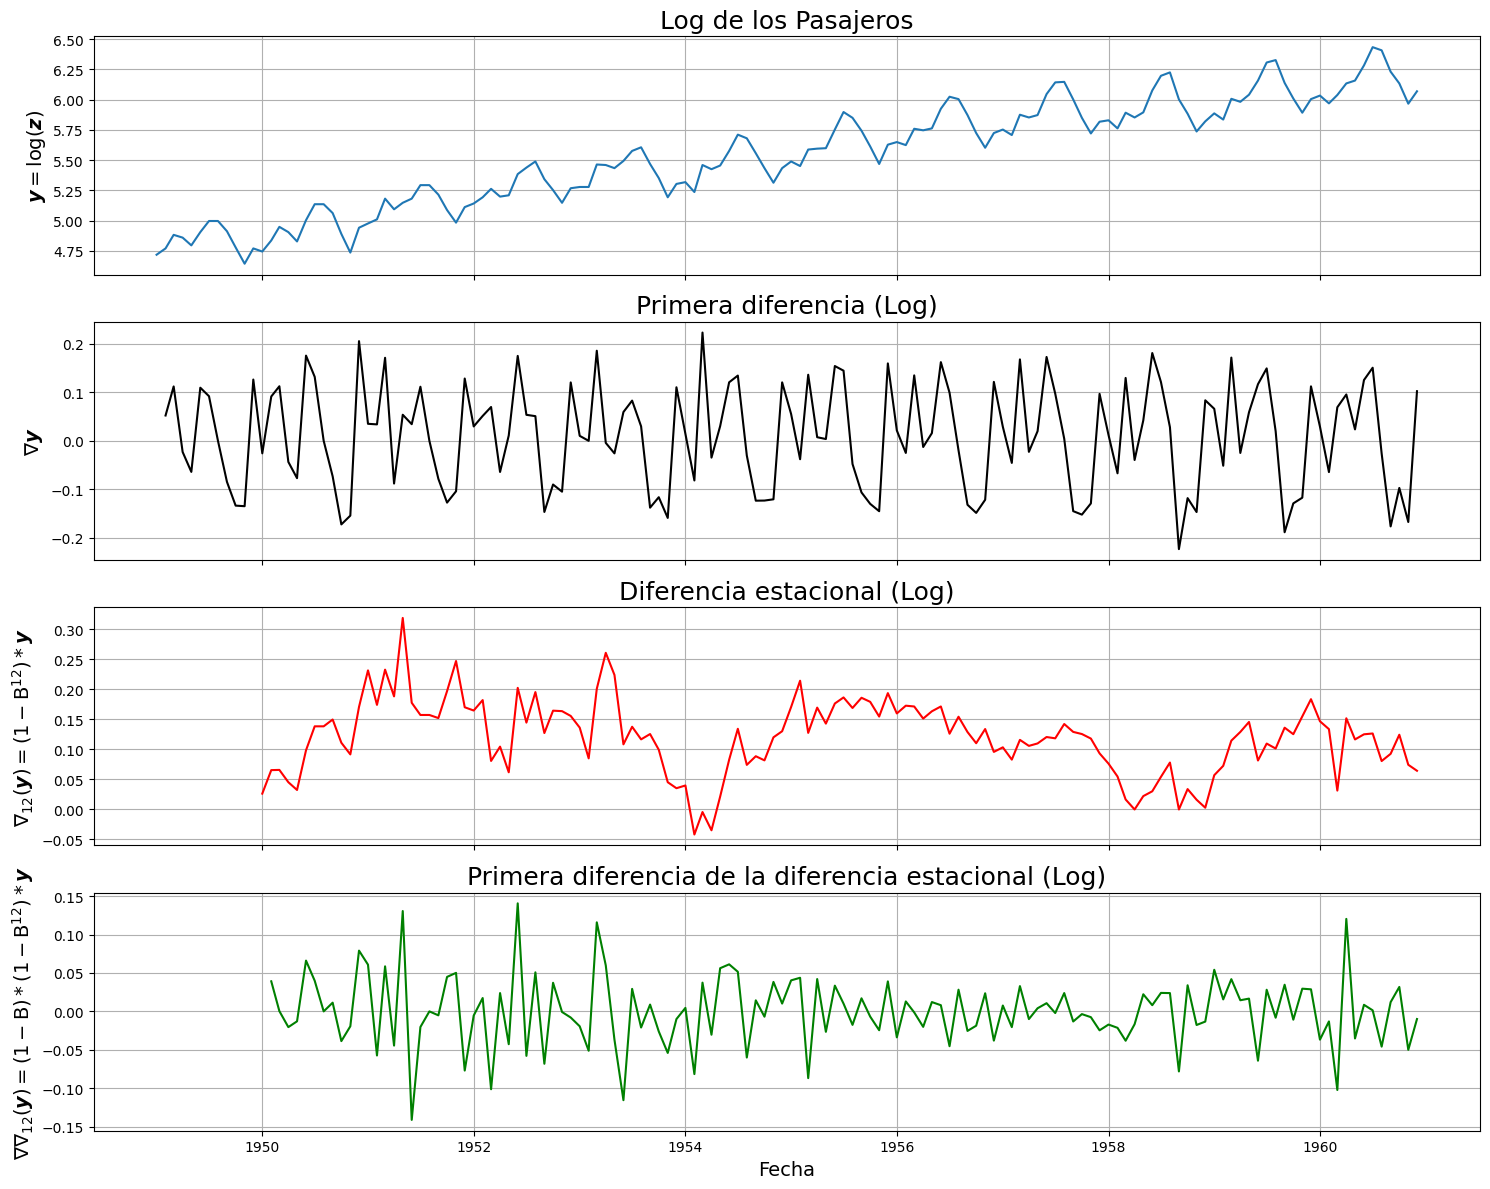

In [14]:
# Leer los datos
df = pd.read_csv('../datos/airline-passengers.csv')

# Asegurarse de que la columna Month sea tipo datetime
df['Month'] = pd.to_datetime(df['Month'])

# Establecer la columna Month como índice
df.set_index('Month', inplace=True)

# Calcular el logaritmo de los pasajeros
df['log_passengers'] = np.log(df['Passengers'])

# Calcular la primera diferencia
df['primera_diferencia'] = df['log_passengers'].diff()

# Calcular la diferencia estacional (de orden 12)
df['diferencia_estacional'] = df['log_passengers'] - df['log_passengers'].shift(12)

# Calcular la primera diferencia de la diferencia estacional
df['primera_diferencia_estacional'] = df['diferencia_estacional'].diff()

# Crear la figura y los ejes, compartiendo el eje x
fig, axs = plt.subplots(4, 1, figsize=(15, 12), sharex=True)  # 4 filas, 1 columna

# Graficar el logaritmo de la población
axs[0].plot(df.index, df['log_passengers'])
axs[0].set_ylabel(r'$\boldsymbol{y}=\log(\boldsymbol{z})$', fontsize=14)
axs[0].set_title('Log de los Pasajeros', fontsize=18)
axs[0].grid()

# Graficar la primera diferencia
axs[1].plot(df.index, df['primera_diferencia'], color='black')
axs[1].set_ylabel(r'$\nabla\boldsymbol{y}$', fontsize=14)
axs[1].set_title('Primera diferencia (Log)', fontsize=18)
axs[1].grid()

# Graficar la diferencia estacional
axs[2].plot(df.index, df['diferencia_estacional'], color='red')
axs[2].set_ylabel(r'$\nabla_{12}(\boldsymbol{y})=(1-\mathsf{B^{12}})*\boldsymbol{y}$', fontsize=14)
axs[2].set_title('Diferencia estacional (Log)', fontsize=18)
axs[2].grid()

# Graficar la primera diferencia de la diferencia estacional
axs[3].plot(df.index, df['primera_diferencia_estacional'], color='green')
axs[3].set_xlabel('Fecha', fontsize=14)
axs[3].set_ylabel(r'$\nabla\nabla_{12}(\boldsymbol{y})=(1-\mathsf{B})*(1-\mathsf{B^{12}})*\boldsymbol{y}$', fontsize=14)
axs[3].set_title('Primera diferencia de la diferencia estacional (Log)', fontsize=18)
axs[3].grid()

# Ajustar el layout
plt.tight_layout()
plt.savefig('./img/lecc06/diferenciasPasajeros.png', dpi=300, bbox_inches='tight')

![img](img/lecc06/diferenciasPasajeros.png)



Como ya vimos, la serie pasajeros en logaritmos tiene tendencia y estacionalidad muy evidentes. No basta con tomar solo una diferencia ordinaria 
$$\nabla\boldsymbol{y}=(1-\mathsf{B})*\boldsymbol{y};$$ 
pues el resultado muestra una pauta estacional. Ni tampoco basta con tomar solo una diferencia estacional
$$\nabla_{12}(\boldsymbol{y})=(1-\mathsf{B^{12}})*\boldsymbol{y};$$
pues resulta una serie que \`\`deambula'', i.e., que no es *\`\`estacionaria''* en media.

Tomar una diferencia ordinaria y otra estacional
$$\nabla\nabla_{12}(\boldsymbol{y})=(1-\mathsf{B})*(1-\mathsf{B^{12}})*\boldsymbol{y}$$
arroja una serie que sí parece ser *\`\`estacionaria''*.



/tmp/ipykernel_11456/593891255.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df3['Fecha'] = pd.date_range(start='1985-01', periods=len(df3), freq='M') # cambiar por 'ME' en el futuro


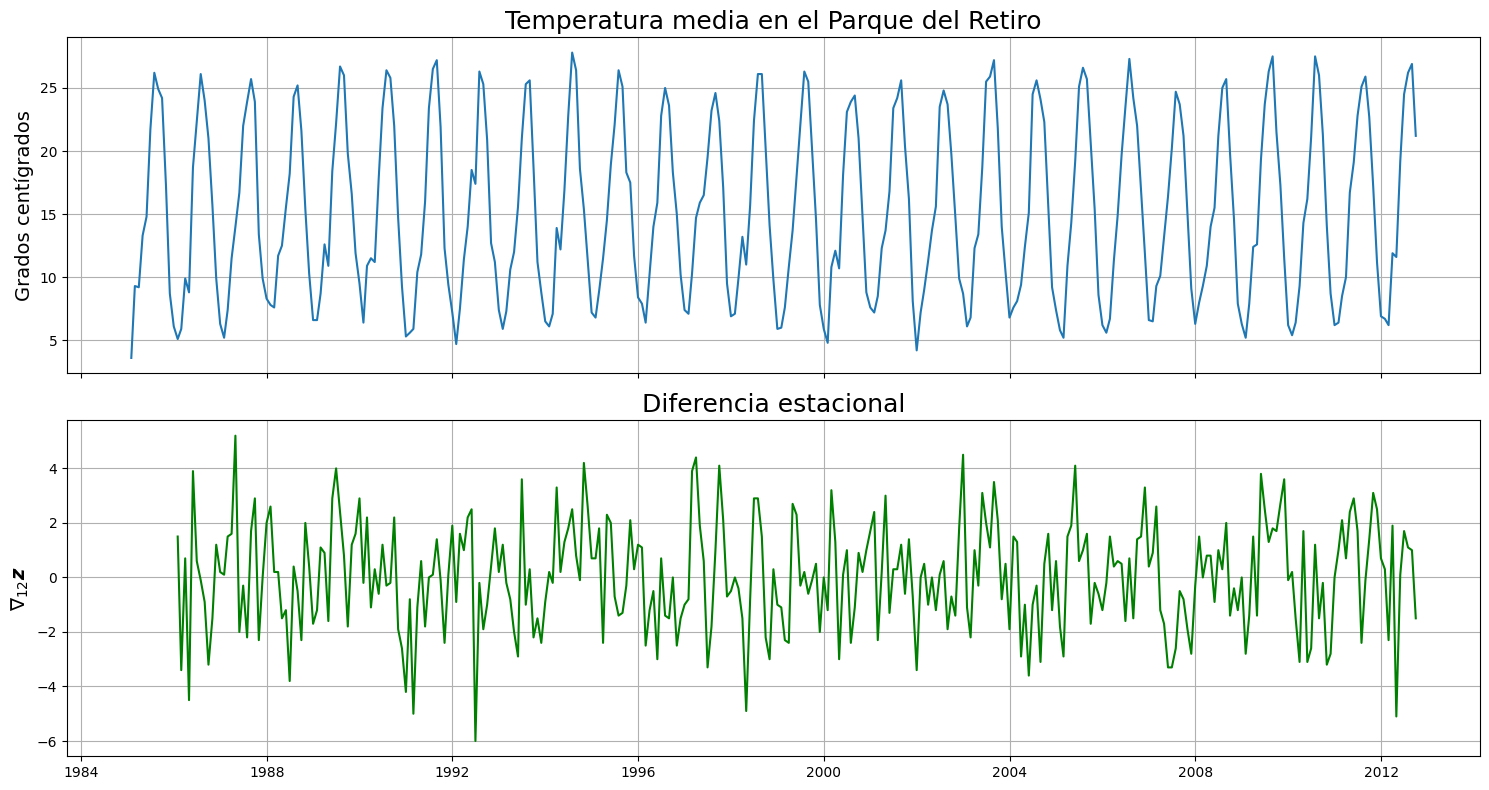

In [15]:
df3 = pd.read_csv('../datos/Retiro.txt')
# Generar una columna de fechas desde enero de 1985
df3['Fecha'] = pd.date_range(start='1985-01', periods=len(df3), freq='M') # cambiar por 'ME' en el futuro

# Configurar la columna de fechas como índice
df3.set_index('Fecha', inplace=True)

# Calcular la diferencia estacional (de orden 12)
df3['diferencia_estacional'] = df3['TemperaturaMedia'] - df3['TemperaturaMedia'].shift(12)
 
# Crear la figura y los ejes, compartiendo el eje x
fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)  # 4 filas, 1 columna

# Graficar el logaritmo de la población
axs[0].plot(df3.index, df3['TemperaturaMedia'])
axs[0].set_ylabel(r'Grados centígrados', fontsize=14)
axs[0].set_title('Temperatura media en el Parque del Retiro', fontsize=18)
axs[0].grid()

# Graficar la primera diferencia
axs[1].plot(df3.index, df3['diferencia_estacional'], color='green')
axs[1].set_ylabel(r'$\nabla_{12}\boldsymbol{z}$', fontsize=14)
axs[1].set_title('Diferencia estacional', fontsize=18)
axs[1].grid()

# Ajustar el layout
plt.tight_layout()
plt.savefig('./img/lecc06/diferenciasTemperaturasRetiro', dpi=300, bbox_inches='tight')

![img](img/lecc06/diferenciasTemperaturasRetiro.png)



En el caso de la serie de temperaturas en el Parque del Retiro, parece
que es suficiente con tomar solo una diferencia estacional.



#### Contrastes formales sobre el orden de integración: DF, ADF y KPSS



##### Test de Dickey-Fuller (DF)



-   **$H_0$:** la serie es $I(1)$
-   **$H_1$:** la serie es $I(0)$.

Sea el siguiente modelo donde $\phi$ es un parámetro autorregresivo y
$U_{t}$ es ruido blanco $$Y_{t}=\phi Y_{t-1}+U_{t},$$

Habrá una raíz unitaria (será no-estacionario) si $\phi =1.\;$ Restando
$Y_{t-1}$ a ambos lados

$$\nabla Y_{t}\;=\;(\phi -1)Y_{t-1}+U_{t}\;=\;\delta Y_{t-1}+U_{t}$$

donde $\delta=\phi -1$ y, por tanto, la $H_0$ se reduce a $\delta=0$.

Pasos del contraste:

-   se estima el último modelo por MCO
-   se calcula el ratio $t$ de significación de $\delta$
-   se compara dicho ratio con la distribución específica del contraste
    $DF$ (pues bajo la nula, el ratio $t$ no se distribuye de la forma
    habitual).



##### Test de Dickey-Fuller aumentado (ADF)



Una variante habitual del test DF es el test de Dickey-Fuller
aumentado (ADF), que consiste en estimar por MCO el modelo: $$\nabla
Y_t = c + \delta Y_{t-1} + \pi_1 \nabla Y_{t-1} + \pi_2 \nabla
Y_{t-2} + \cdots + \pi_p \nabla Y_{t-p} + U_t$$ que añade $p$ retardos
del regresando como regresores para permitir autocorrelación. Por lo
demás, el test se calcula de la forma habitual (comparando de ratio
$t$ de $\widehat{\delta}$ con las tablas del test ADF).

Otra variante consiste en incluir una tendencia temporal determinista:
$$\nabla Y_t = \underbrace{c + \beta t} + \delta Y_{t-1} + \pi_1 \nabla Y_{t-1} + \pi_2 \nabla Y_{t-2} + \cdots + \pi_p \nabla Y_{t-p} + U_t$$



##### Test Kwiatkowski–Phillips–Schmidt–Shin (KPSS)



El contraste KPSS es un contraste alternativo (y complementario) al test DF/ADF

Las hipótesis del test KPSS están invertidas respecto a las del Test DF

-   **$H_0$:** la serie es $I(0)$.
-   **$H_1$:** la serie es $I(1)$ o estacionaria en torno a una tendencia determinista

**DF/ADF y KPSS se complementan.** Si la serie es:

-   *estacionaria*: el test DF/ADF debería rechazar su $H_0:$ la serie es $I(1)$
-   *NO estacionaria*: el test KPSS debería rechazar su $H_0:$ la serie es $I(0)$

Estos test son poco potentes y son frágiles ante incumplimientos
(heterocedasticidad o no-normalidad); por ello debemos complementarlos
con el análisis gráfico.



### ACF muestral



La *k*-ésima autocorrelación muestral simple ($\widehat{\rho_k}$) se
define como:
$$\widehat{\rho_k}=\frac{\widehat{\gamma_k}}{\widehat{\gamma_0}};\qquad
\widehat{\gamma_k}=\frac{1}{n}\sum_{t=k+1}^n
\widetilde{X_t}\widetilde{X_{t-k}},\quad\text{para }\;k=1,2,\ldots$$
donde $\widetilde{X_t}=X_t-\bar{X}$.

Para valorar la significatividad individual de estas autocorrelaciones
puede usarse el error estándar asintótico:
$s.e.(\widehat{\rho_k})=1/\sqrt{n}$.

Para contrastar la $H_0:$ *los $k$ primeros retardos son conjuntamente 
no significativos* (es decir, para contrastar si el proceso es *ruido
blanco*) se emplea el test de Ljung-Box $$Q =
n\left(n+2\right)\sum_{k=1}^h\frac{\hat{\rho}^2_k}{n-k}$$
(usaremos el test de Ljung-Box para evaluar los modelos).



### PACF muestral



La *k*-ésima autocorrelación muestral $\widehat{\pi_k}$ se puede
estimar mediante el algoritmo Levinson-Durbin sustituyendo las
autocorrelaciones teóricas por las muestrales.

O bien, calculando el *k*-ésimo coeficiente MCO de una autorregresión
de orden $k$ $$\widetilde{X}_t =
\widehat{\phi_{k1}}\widetilde{X}_{t-1} +
\widehat{\phi_{k2}}\widetilde{X}_{t-2} + \cdots +
\widehat{\phi_{kk}}\widetilde{X}_{t-k} + U_t;\qquad k = 1, 2,\ldots$$
donde $\widetilde{X}_t=X_t-\bar{X}\;$ y donde
$\;\widehat{\pi_k}=\widehat{\phi_{kk}}$



### Otras herramientas estadísticas



#### Estadísticos descriptivos



-   el nivel de la serie (media, mediana),
-   valores extremos (máximo y mínimo). A veces son outliers o errores de registro
-   dispersión de la variable (desviación típica, coeficiente de variación, rango, rango interpercentiles, rango intercuartílico)
-   otros momentos (asimetría, exceso de curtosis)

También es frecuente contrastar si la media es significativa ( $H_0: \mu = 0$)
$$\frac{\widehat{\mu}}{\widehat{dt(\widehat{\mu})}}\underset{H_0}{\sim}t_{n-1};\qquad
\widehat{dt(\widehat{\mu})}=\frac{\widehat{\sigma}}{\sqrt{n}}.$$



In [16]:
df3['TemperaturaMedia'].describe()

count    333.000000
mean      15.211712
std        6.957194
min        3.600000
25%        9.000000
50%       14.300000
75%       21.900000
max       27.800000
Name: TemperaturaMedia, dtype: float64

#### Contraste de normalidad Jarque-Bera



[Jarque-Bera test (Wikipedia)](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test)

-   **Si los datos son mayores que cero:** a menudo la transformación
    logarítmica ayuda a conseguir normalidad

-   **Si hay valores atípicos:** el mejor tratamiento es *intervenirlos*.



In [17]:
from scipy import stats
rng = np.random.default_rng()
x = rng.normal(0, 1, 100000)
jarque_bera_test = stats.jarque_bera(x)
jarque_bera_test
#jarque_bera_test.statistic
#jarque_bera_test.pvalue

SignificanceResult(statistic=np.float64(5.761877092556988), pvalue=np.float64(0.056082102477338136))

## Nota final



Se puede demostrar que

-   si un proceso tiene una ACF $\boldsymbol{\rho}$ con cogrado $-q$ y grado $q$, es un proceso MA($q$)
-   si un proceso tiene una PACF $\boldsymbol{\pi}$ con cogrado $-p$ y grado $p$, es un proceso AR($p$)

Véase *Pourahmadi M. (2001).*

Consecuentemente, que la ACF o la PACF se corten \`\`bruscamente'' nos indica que el modelo es AR o MA (además de su grado).

Desgraciadamente para los modelos ARMA tanto la ACF como la PACF tienen infinitos términos no nulos, por lo que su identificación no es tan sencilla.


| |<b>ACF finita</b>|<b>ACF persistente</b>|
|---|---|---|
| <b>PACF finita</b>|<u>Ruido blanco</u>: retardos conjuntamente NO significativos|<u>AR</u>: orden indicado por la PACF|
| <b>PACF persistente</b>|<u>MA</u>: orden indicado por la ACF|<u>ARMA</u>|



## Las Ecuaciones de Yule-Walker para un AR(p) estacionario



Sea un AR($p$) estacionario:
$\;\;\boldsymbol{\phi}(\mathsf{B})X_t=U_t\;\;$ donde $\;\;\boldsymbol{\phi}(z)=1-\phi_1z^1-\cdots-\phi_pz^p.\;$
Multiplicando por $X_{t-k}$ y tomando esperanzas:
$$
 E\Big[\Big(\boldsymbol{\phi}(\mathsf{B})X_t\Big)\cdot X_{t-k}\Big] =
 E[U_t\cdot X_{t-k}]
$$

Estas ecuaciones se denominan *Ecuaciones de Yule-Walker* y permiten calcular las autocovarianzas y autocorrelaciones de manera iterativa.



*Por una parte* (lado izquierdo):

Si $\boldsymbol{X}$ es un proceso (débilmente) estacionario con
$E(\boldsymbol{X})=\boldsymbol{0}\;$ y $\;\boldsymbol{\phi}$ es una serie
formal absolutamente sumable; entonces para $t,k\in\mathbb{Z}$

\begin{equation}
  E\Big[\Big(\boldsymbol{\phi}(\mathsf{B})X_t\Big)\cdot X_{t-k}\Big]
  \quad = \quad
  \boldsymbol{\phi}(\mathsf{B})E\big(X_t\cdot X_{t-k}\big)
  \quad = \quad
  \boldsymbol{\phi}(\mathsf{B})\gamma_k
  \label{eqnLadoIzquierdoYW}
\end{equation}

que no depende de $t$, por ser $\boldsymbol{X}$ es un proceso
(débilmente) estacionario.



*Por otra parte* (lado derecho):

Si $\boldsymbol{X}$ tiene representación
$\;\boldsymbol{X}=\boldsymbol{\psi}*\boldsymbol{U}$ donde
$\;\boldsymbol{U}\sim WN(0,\sigma^2)$ y $\boldsymbol{\psi}\in\ell^2$ es una
serie formal con $\psi_0=1$; es decir, si es un proceso lineal causal

$$\quad X_t=U_t + \sum\nolimits_{j=1}^\infty \psi_j U_{t-j},$$
entonces para $t,k\in\mathbb{Z}$

\begin{equation}
  E[U_t\cdot X_{t-k}] = E\Big[U_t\Big(U_{t-k} + \sum\nolimits_{j=1}^\infty \psi_j U_{t-k-j}\Big) \Big]=
  \begin{cases}
  \sigma^2 & \text{cuando } k=0\\
  0 & \text{cuando } k\ne0
  \end{cases}
  \label{eqnLadoDerechoYW}
\end{equation}

Veamos cómo usar las ecuaciones $\ref{eqnLadoIzquierdoYW}$ y $\ref{eqnLadoDerechoYW}$ para calcular autocovarianzas y autocorrelaciones de manera iterativa:



Sea un AR($p$) estacionario:
$\;\;\boldsymbol{\phi}(\mathsf{B})X_t=U_t\;\;$ donde
$\;\;\boldsymbol{\phi}(z)=1-\phi_1z^1-\cdots-\phi_pz^p.\;$
Multiplicando por $X_{t-k}$ y tomando esperanzas:
$$E\Big[\Big(\boldsymbol{\phi}(\mathsf{B})X_t\Big)\cdot X_{t-k}\Big] =
E[U_t\cdot X_{t-k}]$$

**para $k=0$:** $\quad$ (por $\ref{eqnLadoIzquierdoYW}$ y $\ref{eqnLadoDerechoYW}$)
$$\fbox{$\boldsymbol{\phi}(\mathsf{B})\gamma_0=\sigma^2$}
\quad\Rightarrow\quad
\gamma_0-\phi_1\gamma_1-\cdots-\phi_p\gamma_p=\sigma^2
\quad\Rightarrow\quad \sigma^2=\gamma_0-\sum\nolimits_{j=1}^p\phi_j\gamma_j.$$
Dividiendo por $\gamma_0$ (y recordando que $\rho_0=1$):
$$\boldsymbol{\phi}(\mathsf{B})\rho_0=\frac{\sigma^2}{\gamma_0}
\quad\Rightarrow\quad
\fbox{$\gamma_0=\frac{\sigma^2}{\boldsymbol{\phi}(\mathsf{B})\rho_0}$}
\quad\Rightarrow\quad
\gamma_0=\frac{\sigma^2}{1-\sum\nolimits_{j=1}^p\phi_j\rho_j}.$$ 

**para $k>0$:** $\quad$ (por $\ref{eqnLadoIzquierdoYW}$ y $\ref{eqnLadoDerechoYW}$)
$$\fbox{$\boldsymbol{\phi}(\mathsf{B})\gamma_k=0$}
\quad\Rightarrow\quad
\gamma_k-\phi_1\gamma_{k-1}-\cdots-\phi_p\gamma_{k-p}=0
\quad\Rightarrow\quad \gamma_k=\sum\nolimits_{j=1}^p\phi_j\gamma_{k-j}.$$ 
Dividiendo por $\gamma_0$:
$$\fbox{$\boldsymbol{\phi}(\mathsf{B})\rho_k=0$}
\quad\Rightarrow\quad
\rho_k-\phi_1\rho_{k-1}-\cdots-\phi_p\rho_{k-p}=0
\quad\Rightarrow\quad \rho_k=\sum\nolimits_{j=1}^p\phi_j\rho_{k-j}.$$



En resumen, la estructura autorregresiva del proceso impone que las
autocovarianzas (y las autocorrelaciones) verifiquen las ecuaciones de
Yule-Walker.



### Función de autocovarianzas para un ARMA(p,q)



Sea un ARMA($p,q$) estacionario:
$\boldsymbol{\phi}(\mathsf{B}){X_t}=\boldsymbol{\theta}(\mathsf{B}){U_t}\;$
donde $\boldsymbol{\phi}$ y $\boldsymbol{\theta}$ no tienen raíces
comunes. Multiplicando por $X_{t-k}$, tomando esperanzas y
sustituyendo $X_{t-k}$ por su representación MA($\infty$), donde
$\boldsymbol{\psi}=\frac{\boldsymbol{\theta}}{\boldsymbol{\phi}}$:
$$\underbrace{E\Big[\Big(\boldsymbol{\phi}(\mathsf{B})X_t\Big)\cdot
X_{t-k}\Big]}_{\boldsymbol{\phi}(\mathsf{B})\gamma_k\;(\text{por
\ref{eqnLadoIzquierdoYW}})} =
E\Big[\Big(\boldsymbol{\theta}(\mathsf{B})U_t\Big)\cdot X_{t-k}\Big]
\;=\;
\underbrace{E\Big[\Big(\boldsymbol{\theta}(\mathsf{B})U_t\Big)\cdot
\Big(\boldsymbol{\psi}(\mathsf{B})U_{t-k}\Big)\Big]}_{\boldsymbol{\gamma_{_{\boldsymbol{W},\boldsymbol{Y}}}}(k)}$$
Donde hemos usando $\eqref{eqnLadoIzquierdoYW}$ y renombrando
$\;\boldsymbol{\theta}(\mathsf{B})U_t=\boldsymbol{W}\;$ y
$\;\boldsymbol{\psi}(\mathsf{B})U_t=\boldsymbol{Y}.\;$ Así:

\begin{align*}
  \boldsymbol{\phi}(\mathsf{B})\gamma_k & = \boldsymbol{\gamma_{_{\boldsymbol{W},\boldsymbol{Y}}}}(k)\\
  & =  \sigma^2 \Big(\boldsymbol{\theta}(z)*\boldsymbol{\psi}(z^{-1})\Big)_k & \text{por } (5-Lecc 3)
\end{align*}

Por 
Y como $\boldsymbol{\theta}(z)*\boldsymbol{\psi}(z^{-1})$ tiene grado $q$ y cogrado $-\infty$

\begin{equation}
  \boldsymbol{\phi}(\mathsf{B})\gamma_k = 
  \begin{cases}
     0 & k > q\quad \text{(como en un AR)}\\
    \sigma^2 \Big(\boldsymbol{\theta}(z)*\boldsymbol{\psi}(z^{-1})\Big)_k & k\leq q
   \quad \text{(que depende de $\boldsymbol{\theta}$ y $\boldsymbol{\phi}$)}
  \end{cases}
\end{equation}

(Donde (5-Lecc 3) se refiere a la [última ecuación de la Lección 3](https://mbujosab.github.io/Econometria-Aplicada/Lecciones-pdf/Lecc03.pdf#subsection.5.2))

